<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mod-2---King-County-Housing-Project" data-toc-modified-id="Mod-2---King-County-Housing-Project-1">Mod 2 - King County Housing Project</a></span><ul class="toc-item"><li><span><a href="#King-County" data-toc-modified-id="King-County-1.1">King County</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-1.2">Methodology</a></span></li><li><span><a href="#Data-Obtaining-and-Scrubbing" data-toc-modified-id="Data-Obtaining-and-Scrubbing-1.3">Data Obtaining and Scrubbing</a></span></li><li><span><a href="#Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-Technology-town-close-to-King-County." data-toc-modified-id="Adding-a-new-feature,-Distance-to-Bellevue,-which-is-a-Technology-town-close-to-King-County.-1.4">Adding a new feature, Distance to Bellevue, which is a Technology town close to King County.</a></span></li><li><span><a href="#Selecting-our-data-based-on-the-price-of-the-house" data-toc-modified-id="Selecting-our-data-based-on-the-price-of-the-house-1.5">Selecting our data based on the price of the house</a></span></li><li><span><a href="#OLS-Model-Baseline" data-toc-modified-id="OLS-Model-Baseline-1.6">OLS Model Baseline</a></span></li><li><span><a href="#Run-the-same-model-in-Scikit-Learn" data-toc-modified-id="Run-the-same-model-in-Scikit-Learn-1.7">Run the same model in Scikit-Learn</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.8">Feature Selection</a></span></li><li><span><a href="#Variance-Inflation-Factor" data-toc-modified-id="Variance-Inflation-Factor-1.9">Variance Inflation Factor</a></span></li><li><span><a href="#Reselecting-the-variables" data-toc-modified-id="Reselecting-the-variables-1.10">Reselecting the variables</a></span></li><li><span><a href="#Stepwise-selection-with-p-values" data-toc-modified-id="Stepwise-selection-with-p-values-1.11">Stepwise selection with p-values</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-1.12">Observations</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.13">Conclusion</a></span></li><li><span><a href="#Future-work-and-research" data-toc-modified-id="Future-work-and-research-1.14">Future work and research</a></span></li></ul></li></ul></div>

## Mod 2 - King County Housing Project

Please fill out:
* __Student name: Vidya Menon__
* __Student pace: Full Time__
* __Scheduled project review date/time: 05/04/2020 3PM__
* __Instructor name: Amber Yandow__


### King County
King County is a county located in the U.S. state of Washington. It is one of the most populous county in Washington. King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
This notebook contains analysis of the housing data in King County to understand which factors are important when selling a house.

Through this analysis we are going to answer some of the questions as below:    
__Q1- What is the average cost of a house in King County?__

__Q2- Does Renovation have an effect on increasing the price of a house?__

__Q3- What are the important features to consider while selling a house?__

__Q4- How does the distance to a workplace effect the cost of a house?__

__Q5- Does having a waterfront view effect the price of a house?__


In [394]:
# Importing the Libraries

import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import lmplot
from seaborn import distplot, boxplot, despine

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure
from matplotlib.pyplot import subplot
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import scipy

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas_bokeh
pandas_bokeh.output_notebook()


Loading BokehJS ...

In [395]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [396]:
!ls

column_names.md
CONTRIBUTING.md
data
halfway-there.gif
kc_house_data.csv
LICENSE.md
mod2_project_rubric.pdf
README.md
Rough_Copy.ipynb
Rough_Copy-Copy1.ipynb
student.ipynb
student-Copy1.ipynb
tile.html


 ### Methodology
*__OSEMN Methodology__ -  This is the one of the most straightforward of the Data Science processes. During this process,the stages often blur together. It is completely acceptable (and often a best practice!) to float back and forth between stages as you learn new things about your problem, dataset, requirements, etc. It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. As with any of the frameworks, OSEMN is meant to be treated more like a set of guidelines for structuring your project than set-in-stone steps that cannot be violated.

- __Obtain__ - This step involves understanding stakeholder requirements, gathering information on the problem, and finally, sourcing data that we think will be necessary for solving this problem.
- __Scrub__ - During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.
- __Explore__ -  During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks like that.
- __Model__ -  It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.
- __Interpret__ - During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. If your results are satisfactory to all stakeholders involved, you may also go from this stage right into putting your model into production and automating processes necessary to support it.

### Data Obtaining and Scrubbing

In [397]:
king_data = pd.read_csv('kc_house_data.csv')
display(king_data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [398]:
king_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


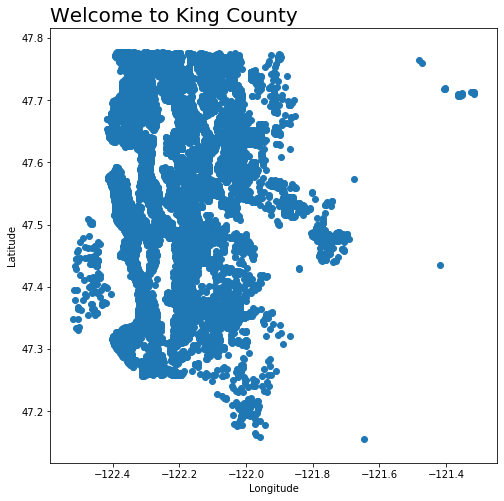

In [399]:
# Map of King County
plt.figure(figsize= (8, 8))
plt.scatter(x='long',y='lat',data=king_data)
plt.title('Welcome to King County',fontsize=20,loc='left')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show();

- __In our data file, the term Condition refers to the “Building Condition”. It has values between 1 and 5, where 1 indicates a worn-out property and 5 indicates a very good condition.__
- __Grade has an index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.__ 
- __View - An index from 0 to 4 of how good the view of the property is.__

In [400]:
# Checking the range of our data which shows that it is from May 2014 to May 2015
king_data['date'] = pd.to_datetime(king_data['date'])
print(king_data['date'].min(), king_data['date'].max())

2014-05-02 00:00:00 2015-05-27 00:00:00


<Figure size 1440x720 with 0 Axes>

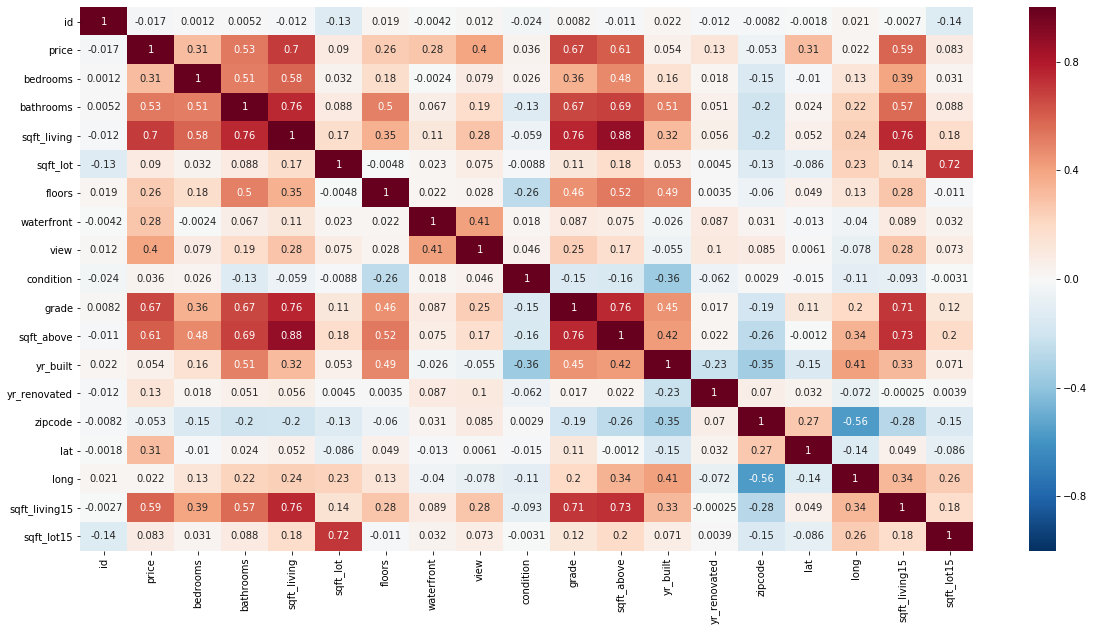

In [401]:
correlation = king_data.corr()
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [402]:
np.round(king_data.describe())

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.0,21597.0,21597.0,21597.0,21597.0,21597.0,19221.0,21534.0,21597.0,21597.0,21597.0,21597.0,17755.0,21597.0,21597.0,21597.0,21597.0,21597.0
mean,4.580474e+09,540297.0,3.0,2.0,2080.0,15099.0,1.0,0.0,0.0,3.0,8.0,1789.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12758.0
std,2.876736e+09,367368.0,1.0,1.0,918.0,41413.0,1.0,0.0,1.0,1.0,1.0,828.0,29.0,400.0,54.0,0.0,0.0,685.0,27274.0
min,1.000102e+06,78000.0,1.0,0.0,370.0,520.0,1.0,0.0,0.0,1.0,3.0,370.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,322000.0,3.0,2.0,1430.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10685.0,2.0,0.0,0.0,4.0,8.0,2210.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [403]:
print ("The average home price in King County is $" + str(int(round(king_data.price.mean()))))

The average home price in King County is $540297


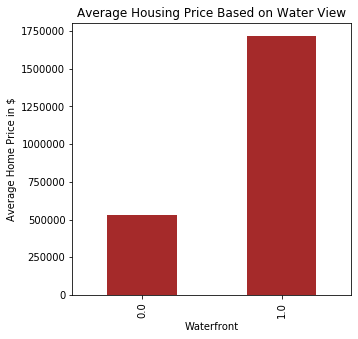

In [404]:
#To understand the effect of waterview on the price of a house

king_data.groupby("waterfront").price.mean().plot(kind="bar",figsize=(5,5),color='brown');
plt.title("Average Housing Price Based on Water View")
plt.ylabel("Average Home Price in $")
plt.xlabel("Waterfront");

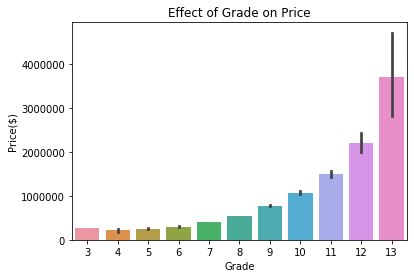

In [405]:
sns.barplot(x=king_data['grade'], y=king_data['price']).set(title = 'Effect of Grade on Price', xlabel = 'Grade', ylabel = 'Price($)' );

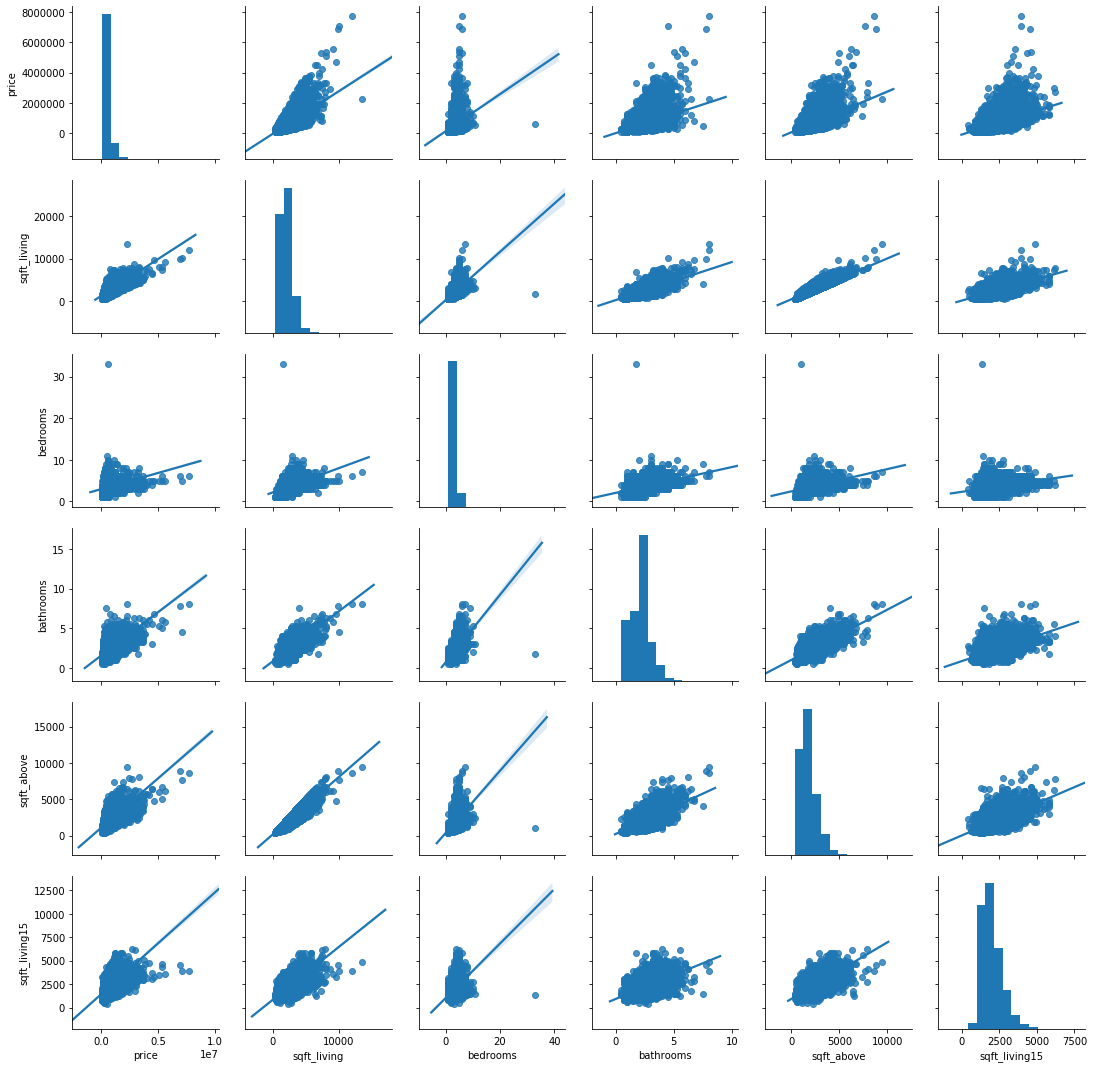

In [406]:
sns.pairplot(king_data[["price","sqft_living","bedrooms","bathrooms","sqft_above","sqft_living15"]],kind="reg")

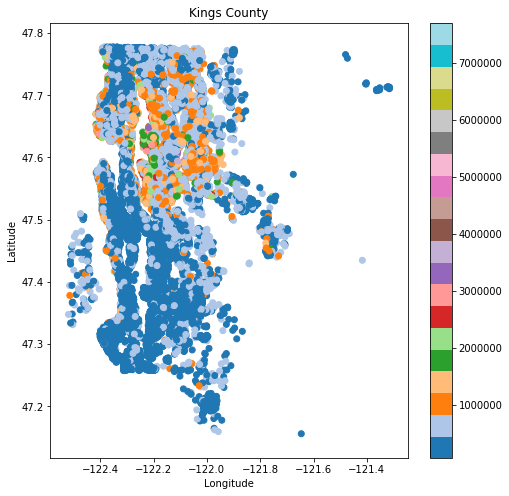

In [407]:
#Used the reference here for colormaps - https://matplotlib.org/examples/color/colormaps_reference.html
plt.figure(figsize= (8, 8))
x = king_data['long']
y = king_data['lat']

plt.scatter(x, y, c=king_data['price'], cmap='tab20', marker='o')
plt.title('Kings County')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show;

In [408]:
special_features = ["waterfront", "grade","bedrooms","bathrooms"]

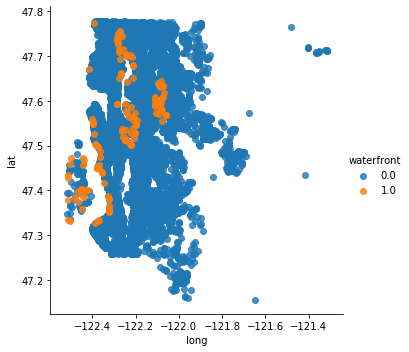

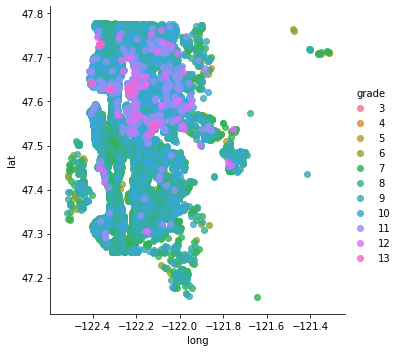

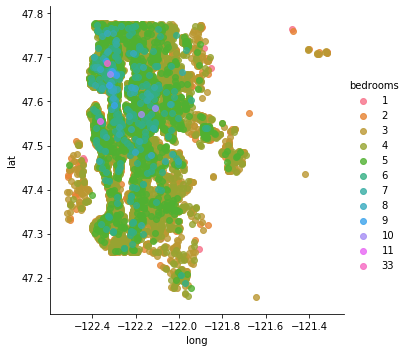

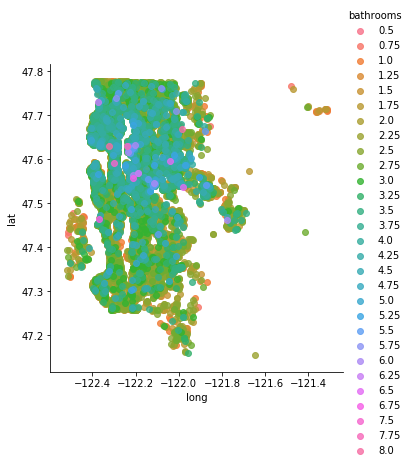

In [409]:
for x in special_features:

    lmplot(data=king_data, x="long", y="lat",fit_reg=False, hue=x, height=5)
    show();

<Figure size 360x360 with 0 Axes>

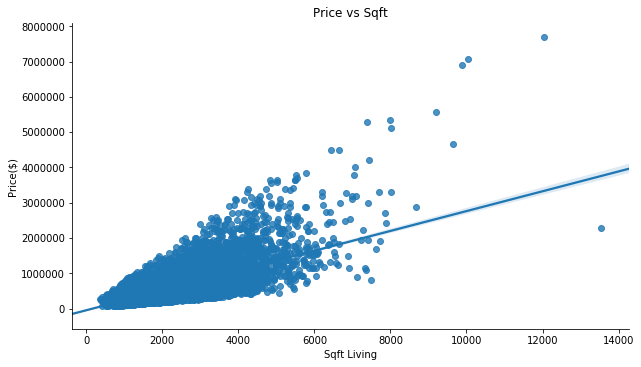

In [410]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="sqft_living", y="price",aspect=1.8,data=king_data)
plt.title("Price vs Sqft")
g.set_xlabels("Sqft Living")
g.set_ylabels("Price($)")
plt.show();

<Figure size 360x360 with 0 Axes>

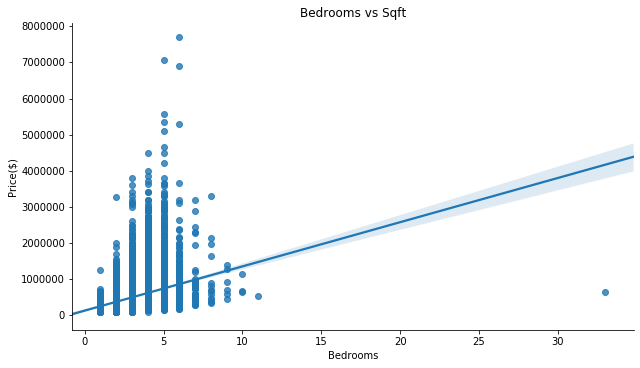

In [411]:
plt.figure(figsize = (5,5));
g=sns.lmplot(x="bedrooms", y="price",aspect=1.8,data=king_data)
plt.title("Bedrooms vs Sqft")
g.set_xlabels("Bedrooms")
g.set_ylabels("Price($)")
plt.show();

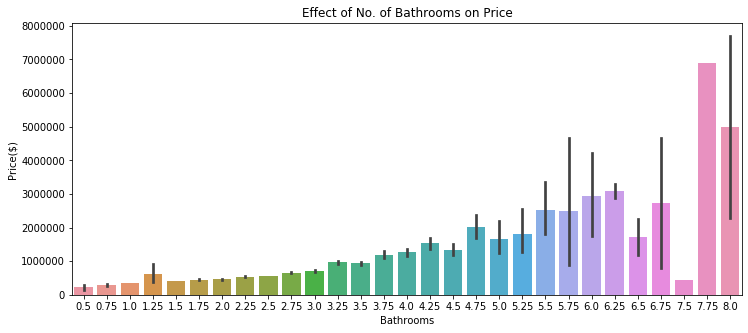

In [412]:
plt.figure(figsize=(12,5))
sns.barplot(x=king_data.bathrooms, y=king_data.price).set(title = 'Effect of No. of Bathrooms on Price', xlabel = 'Bathrooms', ylabel = 'Price($)' );

In [413]:
king_data['condition'].unique()
king_data['grade'].unique()
king_data['zipcode'].unique()
king_data['zipcode'].value_counts()
king_data['sqft_basement'].value_counts()

array([3, 5, 4, 1, 2], dtype=int64)

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1008.0        1
1481.0        1
906.0         1
2610.0        1
417.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [414]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

array([nan,  0.,  1.])

In [415]:
king_data.fillna(0, inplace=True)

In [416]:
king_data['view'].unique()
king_data['waterfront'].unique()

array([0., 3., 4., 2., 1.])

array([0., 1.])

In [417]:
# Replacing the '?' in our data frame
king_data = king_data.replace(to_replace='?', value = 0.0)
king_data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
506.0         1
274.0         1
2240.0        1
1284.0        1
Name: sqft_basement, Length: 304, dtype: int64

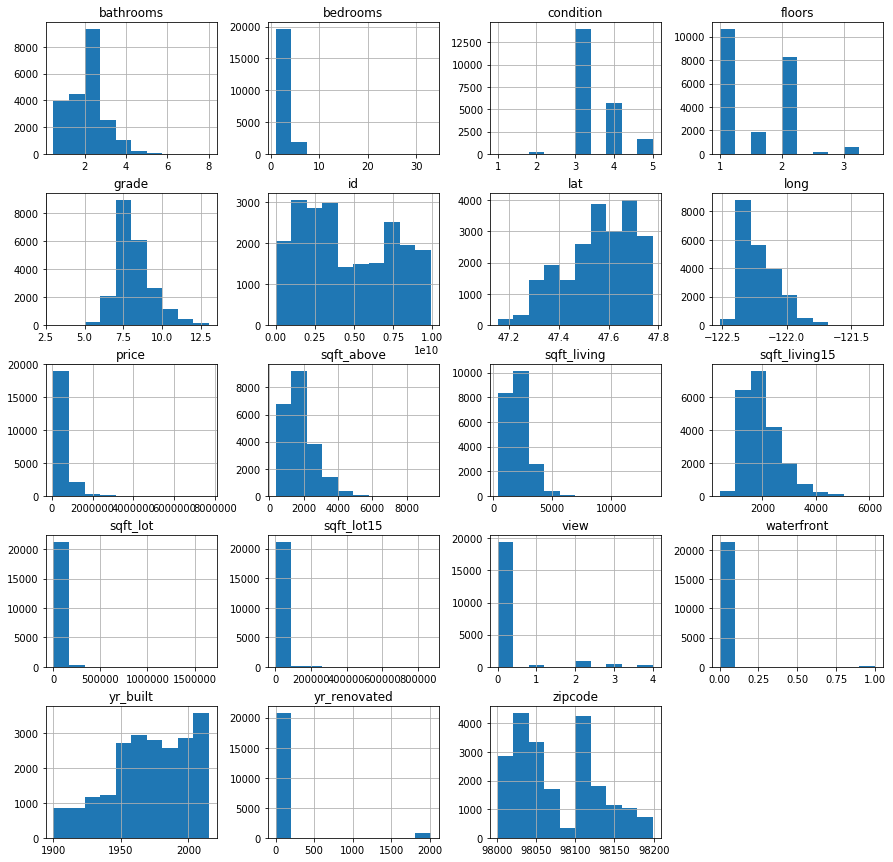

In [418]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
king_data.hist(ax = ax);

In [419]:
#Create a new column to indicate if the house is renovated or not.

king_data['renovated'] = king_data['yr_renovated']
king_data['renovated'] = king_data['renovated'].astype(str)
king_data['renovated']=np.where(king_data['renovated'] != '0.0' , '1', '0')
king_data.head()
king_data['renovated'].unique()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


array(['0', '1'], dtype=object)

### Adding a new feature, Distance to Bellevue, which is a Technology town close to King County.
With the help of Haversine formula we can find the distance between the locations using the Latitude and Longitude. 
The reasoning behind this is that people tend to select their homes based on the proximity to their workplaces. 

In [420]:
# Distance function
from haversine import haversine

# Location of Bellevue
bellevue = (47.6111636,-122.3729398)

# Initialize a list to store the distances between locations and Bellevue  
# Then loop through the dataframe and calculate distance using Haversine formula
distance_diff= []
dist_belle = []

for index, row in king_data.iterrows():
    distance_diff.append(haversine(bellevue, (row['lat'],row['long']) , unit='mi'))
    
# Store the values in the dataframe
king_data['miles_to_belle'] = distance_diff


In [421]:
king_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,8.770690
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,10.911701
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537


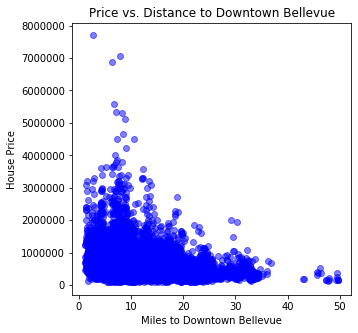

In [422]:
plt.figure(figsize = (5,5));
plt.scatter(king_data['miles_to_belle'],king_data['price'],alpha=0.5, color='blue')
plt.title("Price vs. Distance to Downtown Bellevue")
plt.xlabel("Miles to Downtown Bellevue")
plt.ylabel("House Price")

plt.show();


In [423]:
king_data['miles_to_belle'].unique()

array([ 8.77069009,  7.99324404, 10.91170126, ...,  6.96008862,
        3.63417743,  3.64084605])

In [424]:
def plotting_histo(data_param, col_param):
    for x in col_param:
        fig, ax = plt.subplots(1,2,sharey=True)
        ax[0].hist(data_param[x])
        ax[0].set_ylabel("Counts")
        ax[0].set_xlabel("No. of "+x)
    
        ax[1].hist(data_param[x].apply(np.log))
        ax[1].set_xlabel("Log Value of "+x)

        plt.suptitle("Comparison for "+x,color='red')
        plt.show();

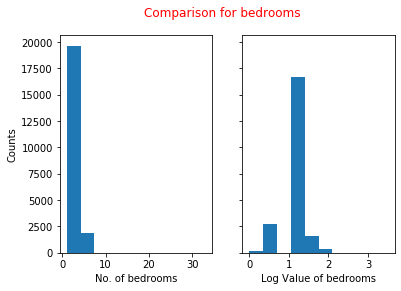

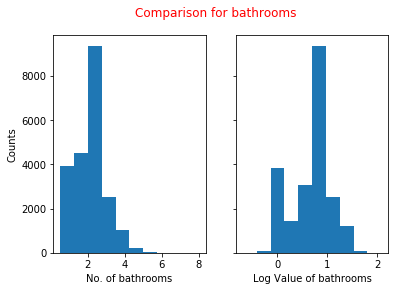

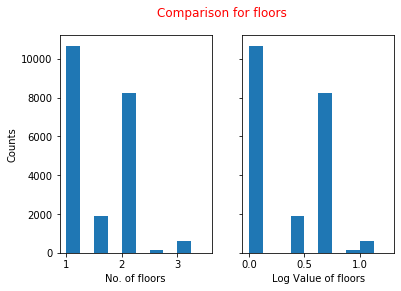

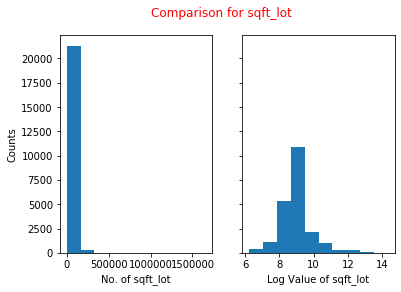

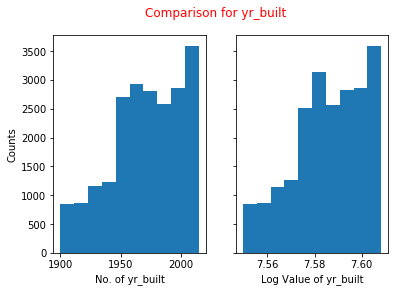

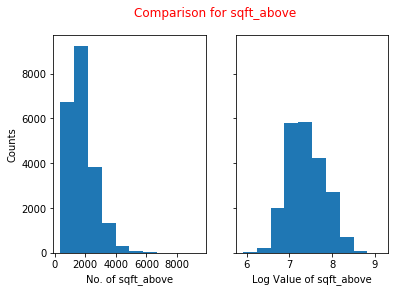

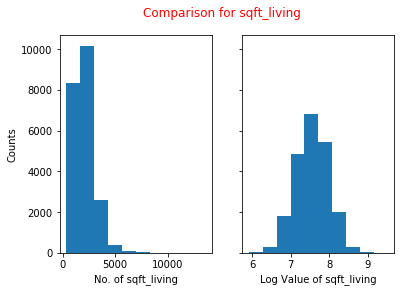

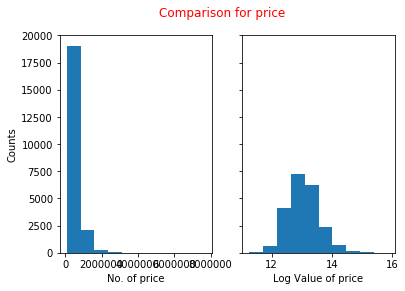

In [425]:
colList=['bedrooms','bathrooms','floors','sqft_lot','yr_built','sqft_above','sqft_living','price']
plotting_histo(king_data,colList)

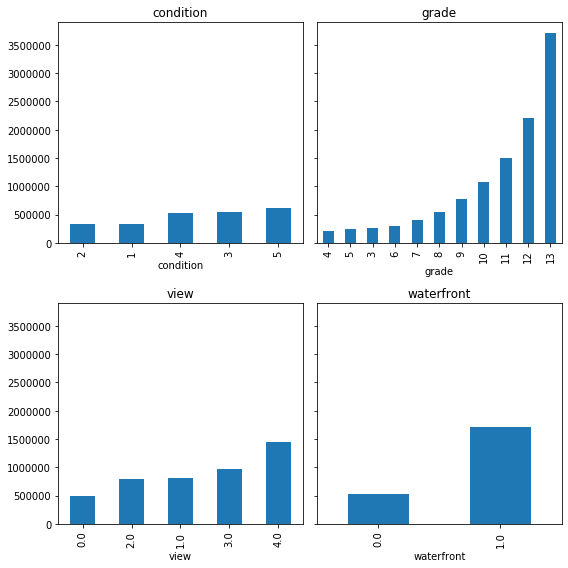

In [426]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8), sharey=True)

categoricals = ['condition', 'grade', 'view', 'waterfront']

for col, ax in zip(categoricals, axes.flatten()):
    (king_data.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout();

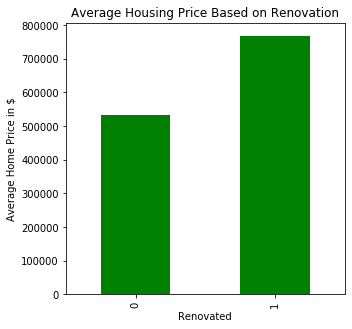

In [427]:
#To understand the effect of renovation on the price of a house

king_data.groupby("renovated").price.mean().plot(kind="bar",figsize=(5,5),color="green");
plt.title("Average Housing Price Based on Renovation")
plt.ylabel("Average Home Price in $")
plt.xlabel("Renovated");

### Selecting our data based on the price of the house

In [428]:
# Creating a new data frame for prices between 300000 and 800000
king_data_price=king_data[(king_data['price'] >= 300000) & (king_data['price'] <= 800000)]
king_data_price
log_king=king_data_price.copy()
len(king_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,10.643058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,6.217377
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,6.960089
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,3.634177
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,15.125662


14226

In [429]:
# Creating a new data frame for prices between 300000 and 600000
new_data_price=king_data[(king_data['price'] >= 300000) & (king_data['price'] <= 600000)]
new_data_price.head()

len(new_data_price)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
11,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,...,0.0,1927,0.0,98028,47.7558,-122.229,1780,12697,0,12.029012


10915

About 50% of our data lies between the price of 300000 and 600000

In [430]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null object
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null object
miles_

In [431]:
price_perc=(len(king_data_price)/len(king_data)) * 100
print(price_perc)

65.87025975829977


In [432]:
king_data_price['sqft_basement'] = king_data_price.sqft_basement.astype('float')
king_data_price['renovated'] = king_data_price.renovated.astype('int')
king_data_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null float64
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null int32
miles_

In [433]:
# create a chart to have the top 10 zipcodes that have the costliest houses
cols=['zipcode','price']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()

mytemp=temp.sort_values(by=('price'),ascending=False).head(10)
mytemp.plot_bokeh.bar()

Figure(id='2130', ...)

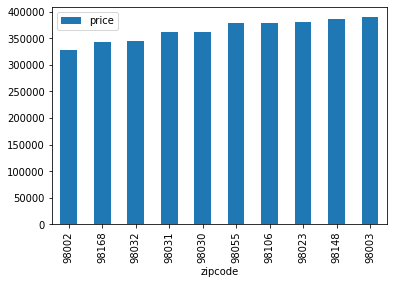

In [434]:
# create a chart to have the top 10 zipcodes that have the cheapest houses
cols=['zipcode','price']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()

mytemp=temp.sort_values(by=('price'),ascending=True).head(10)
mytemp.plot.bar()

In [435]:
# the 10 most expansive and 10 least expansive zipcodes in king county

cols=['price','bedrooms','bathrooms','floors', 'sqft_living', 'sqft_lot', 'miles_to_belle','zipcode']
temp_df=king_data_price.loc[:, cols]
temp=temp_df.groupby('zipcode').mean()
temp.sort_values(by=('price'),ascending=False).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98039,787500.000000,4.000000,1.750000,1.000000,1580.000000,9382.000000,6.771998
98004,701545.910448,3.298507,1.735075,1.216418,1741.343284,10121.223881,8.249929
98040,700457.701493,3.343284,1.992537,1.126866,1988.059701,10956.656716,7.445061
98075,657932.455319,3.748936,2.524468,1.744681,2638.344681,17787.731915,16.410089
98005,646046.115789,3.652632,2.181579,1.136842,2157.578947,12766.873684,9.623478
98109,623970.081967,2.950820,1.819672,1.631148,1555.081967,3016.311475,2.171019
98112,623131.600000,2.936364,1.829545,1.613636,1706.727273,3388.381818,3.623016
98119,612657.432432,2.927928,1.986486,1.684685,1605.945946,3052.387387,2.132139
98006,592594.615672,3.660448,2.175373,1.289179,2186.406716,11410.708955,10.892495


In [436]:
temp.sort_values(by=('price')).head(10)

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,miles_to_belle
zipcode,,,,,,,
98002,327318.421053,4.526316,2.907895,1.710526,2459.473684,7952.210526,21.475399
98168,342075.104167,3.500000,2.062500,1.291667,2082.500000,13081.250000,8.854211
98032,344185.818182,4.136364,2.284091,1.454545,2575.272727,13225.272727,17.386073
98031,362512.796610,3.737288,2.480932,1.745763,2328.855932,15545.177966,16.721656
98030,362667.770642,3.844037,2.440367,1.756881,2433.559633,15567.844037,18.743389
98055,378058.047244,3.653543,2.316929,1.519685,2200.023622,12285.070866,13.337798
98106,379055.740933,3.455959,2.079016,1.430052,1756.689119,5817.725389,4.991792
98023,380805.116564,3.711656,2.519939,1.628834,2683.496933,12866.042945,20.904745
98148,385437.647059,3.529412,2.397059,1.529412,2136.470588,9100.764706,12.089292


In [437]:
# View with Price

cols=['price','view']
temp_df=king_data_price.loc[:, cols]
temp_df.groupby('view').mean().plot_bokeh.bar()

Figure(id='2263', ...)

In [438]:
king_data_price = king_data_price.drop('date',axis=1)
king_data_price = king_data_price.drop('id', axis=1)
king_data_price.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,miles_to_belle
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,7.993244
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,6.313183
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,15.279537
9,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,23.156158
10,662500.0,3,2.50,3560,9796,1.0,0.0,0.0,3,8,...,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925,0,10.643058
11,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,4,7,...,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000,0,6.622943
12,310000.0,3,1.00,1430,19901,1.5,0.0,0.0,4,7,...,0.0,1927,0.0,98028,47.7558,-122.229,1780,12697,0,12.029012
13,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,...,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208,0,15.275541
14,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,3,7,...,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850,0,4.181765
15,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,3,9,...,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000,0,2.749080


In [439]:
# Creating a dictionary to save results of the models being used. 

def store_results_to_dict(model_name, model_desc, r2, r2_adj):
    #,train_rmse,test_rmse):
    curr_dict = None
    curr_dict = {'Model_Name':model_name
                 ,'Model_Description':model_desc
                 ,'R2_value':r2
                 ,'R2_Adjusted value':r2_adj
                }
        
              
    return curr_dict

# To keep a track of all results
results = []

### OLS Model Baseline
__Run a linear model with Price as the target variable in StatsModels__

In [440]:
# OLS Modelling with al features

outcome = 'price'
predictors = king_data_price.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=king_data_price).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     1009.
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:00   Log-Likelihood:            -1.8191e+05
No. Observations:               14226   AIC:                         3.639e+05
Df Residuals:                   14205   BIC:                         3.640e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.982e+07   2.04e+06     29.316      0.000    5.58e+07    6.38e+07
bedrooms       -7701.4984   1011.008     -7.618      0.000   -9683.207   -5719.790
bathrooms       1.184e+04   1795.589      6.593      0.000    8318.662    1.54e+04
sqft_living       51.0120      9.705      5.256      0.000      31.988      70.035
sqft_lot           0.3031      0.027     11.173      0.000       0.250       0.356
floors          6883.4440   1963.980      3.505      0.000    3033.786    1.07e+04
waterfront      1.509e+05   1.58e+04      9.561      0.000     1.2e+05    1.82e+05
view            2.244e+04   1281.762     17.506      0.000    1.99e+04     2.5e+04
condition       1.762e+04   1290.855     13.649      0.000    1.51e+04    2.01e+04
grade           4.763e+04   1224.995     38.881      0.000    4.52e+04       5e+04
sqft_above        19.9263      9.696      2.055      0.040       0.920      38.932
sqft_basement     -5.5314      9.590     -0.577      0.564     -24.329      13.266
yr_built       -1016.2533     40.731    -24.951      0.000   -1096.090    -936.416
yr_renovated    1080.6153    263.516      4.101      0.000     564.089    1597.142
zipcode         -167.5217     19.539     -8.574      0.000    -205.821    -129.222
lat             1.731e+05   7343.058     23.575      0.000    1.59e+05    1.88e+05
long            4.059e+05   9913.876     40.947      0.000    3.87e+05    4.25e+05
sqft_living15     42.3014      2.051     20.624      0.000      38.281      46.322
sqft_lot15         0.1689      0.041      4.166      0.000       0.089       0.248
renovated      -2.142e+06   5.26e+05     -4.075      0.000   -3.17e+06   -1.11e+06
miles_to_belle -1.482e+04    253.524    -58.464      0.000   -1.53e+04   -1.43e+04
==============================================================================
Omnibus:                      326.305   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.941
Skew:                           0.321   Prob(JB):                     1.56e-84
Kurtosis:                       3.489   Cond. No.                     2.83e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Run the same model in Scikit-Learn

In [441]:
y = king_data_price[['price']]
X = king_data_price.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, king_data_price['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 86729.48131092373
Test RMSE score is : 85904.4372205952
Train R2 value: 0.5837348635771491
Test R2 value: 0.5949844285476469


In [442]:
results = store_results_to_dict('Baseline Model','Baseline(with all variables)'
                                     ,model.rsquared, model.rsquared_adj)
                                     
results

{'Model_Name': 'Baseline Model',
 'Model_Description': 'Baseline(with all variables)',
 'R2_value': 0.5869337430899484,
 'R2_Adjusted value': 0.5863521644107368}

In [443]:
results_final = []
results_final.append(results)
results_final

[{'Model_Name': 'Baseline Model',
  'Model_Description': 'Baseline(with all variables)',
  'R2_value': 0.5869337430899484,
  'R2_Adjusted value': 0.5863521644107368}]

### Feature Selection
We are scaling our continuous variables and categorizing our categorical variables.

In [444]:
scaled_bed = (king_data_price.bedrooms - king_data_price.bedrooms.mean()) / king_data_price.bedrooms.std()
scaled_bath = (king_data_price.bathrooms - king_data_price.bathrooms.mean()) / king_data_price.bathrooms.std()
scaled_floors = (king_data_price.floors - king_data_price.floors.mean()) /king_data_price.floors.std()
scaled_basement = (king_data_price.sqft_basement - king_data_price.sqft_basement.mean()) / king_data_price.sqft_basement.std()
scaled_lot = (king_data_price.sqft_lot - king_data_price.sqft_lot.mean()) / king_data_price.sqft_lot.std()
scaled_built = (king_data_price.yr_built - king_data_price.yr_built.mean()) / king_data_price.yr_built.std()
scaled_lat = (king_data_price.lat - king_data_price.lat.mean()) / king_data_price.lat.std()
scaled_long = (king_data_price.long - king_data_price.long.mean()) / king_data_price.long.std()
scaled_sqft_living15 = (king_data_price.sqft_living15 - king_data_price.sqft_living15.mean()) / king_data_price.sqft_living15.std()
scaled_miles_to_belle = (king_data_price.miles_to_belle - king_data_price.miles_to_belle.mean()) / king_data_price.miles_to_belle.std()

data_final = pd.DataFrame([])
data_final['bedrooms'] = scaled_bed
data_final['bathrooms'] = scaled_bath
data_final['floor'] = scaled_floors
data_final['basement'] = scaled_basement
data_final['sqft_lot'] = scaled_lot
data_final['built'] = scaled_built
data_final['lat'] = scaled_lat
data_final['long'] = scaled_long
data_final['sqft_liv'] = scaled_sqft_living15
data_final['miles_belle'] = scaled_miles_to_belle

grade_dummies = pd.get_dummies(king_data_price['grade'], prefix='grade', drop_first=True)
condition_dummies = pd.get_dummies(king_data_price['condition'], prefix='cond', drop_first=True)
view_dummies = pd.get_dummies(king_data_price['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(king_data_price['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(king_data_price['zipcode'], prefix='zip', drop_first=True)
reno_dummies = pd.get_dummies(king_data_price['renovated'], prefix='reno', drop_first=True)

sale_price = king_data_price['price']
data_final = pd.concat([sale_price,data_final,grade_dummies,condition_dummies,zipcode_dummies,view_dummies,waterfront_dummies,reno_dummies], axis=1)
#data_final.info()


In [445]:
data_final=data_final.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 97 columns):
price          14226 non-null float64
bedrooms       14226 non-null float64
bathrooms      14226 non-null float64
floor          14226 non-null float64
basement       14226 non-null float64
sqft_lot       14226 non-null float64
built          14226 non-null float64
lat            14226 non-null float64
long           14226 non-null float64
sqft_liv       14226 non-null float64
miles_belle    14226 non-null float64
grade_5        14226 non-null uint8
grade_6        14226 non-null uint8
grade_7        14226 non-null uint8
grade_8        14226 non-null uint8
grade_9        14226 non-null uint8
grade_10       14226 non-null uint8
grade_11       14226 non-null uint8
cond_2         14226 non-null uint8
cond_3         14226 non-null uint8
cond_4         14226 non-null uint8
cond_5         14226 non-null uint8
zip_98002      14226 non-null uint8
zip_98003      14226 non-null uint8
zip_9

In [446]:
#Model Prediction 1
outcome1 = 'price'
predictors_1 = data_final.drop('price', axis=1)
pred_sum_1 = '+'.join(predictors_1.columns)
formula = outcome1 + '~' + pred_sum_1

model1 = ols(formula=formula, data=data_final).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     307.8
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:02   Log-Likelihood:            -1.8017e+05
No. Observations:               14226   AIC:                         3.605e+05
Df Residuals:                   14129   BIC:                         3.613e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.511e+05   4.14e+04      8.482      0.000     2.7e+05    4.32e+05
bedrooms     1.159e+04    788.604     14.703      0.000       1e+04    1.31e+04
bathrooms    1.997e+04   1023.450     19.510      0.000     1.8e+04     2.2e+04
floor        2158.4878   1011.484      2.134      0.033     175.845    4141.130
basement     3679.1224    827.555      4.446      0.000    2057.005    5301.239
sqft_lot     1.408e+04    736.512     19.123      0.000    1.26e+04    1.55e+04
built       -2.346e+04   1167.607    -20.095      0.000   -2.58e+04   -2.12e+04
lat          3031.2285   5023.531      0.603      0.546   -6815.555    1.29e+04
long         6.404e+04   5942.797     10.775      0.000    5.24e+04    7.57e+04
sqft_liv     3.819e+04    992.023     38.493      0.000    3.62e+04    4.01e+04
miles_belle -7.287e+04   4956.242    -14.703      0.000   -8.26e+04   -6.32e+04
grade_5      1.867e+04   3.31e+04      0.564      0.573   -4.62e+04    8.36e+04
grade_6      1521.5956   3.17e+04      0.048      0.962   -6.05e+04    6.36e+04
grade_7      4.412e+04   3.16e+04      1.397      0.162   -1.78e+04    1.06e+05
grade_8      9.412e+04   3.16e+04      2.976      0.003    3.21e+04    1.56e+05
grade_9      1.663e+05   3.17e+04      5.247      0.000    1.04e+05    2.28e+05
grade_10     2.061e+05   3.19e+04      6.455      0.000    1.43e+05    2.69e+05
grade_11     2.338e+05   3.58e+04      6.537      0.000    1.64e+05    3.04e+05
cond_2       2.384e+04   2.42e+04      0.985      0.324   -2.36e+04    7.12e+04
cond_3       3.927e+04   2.25e+04      1.744      0.081   -4869.373    8.34e+04
cond_4       5.382e+04   2.25e+04      2.390      0.017    9683.435     9.8e+04
cond_5       7.947e+04   2.26e+04      3.515      0.000    3.52e+04    1.24e+05
zip_98002   -2.656e+04   1.93e+04     -1.375      0.169   -6.44e+04    1.13e+04
zip_98003   -9466.3066    1.1e+04     -0.861      0.389    -3.1e+04    1.21e+04
zip_98004     1.85e+05   1.89e+04      9.792      0.000    1.48e+05    2.22e+05
zip_98005    8.207e+04   1.82e+04      4.519      0.000    4.65e+04    1.18e+05
zip_98006    2.854e+04    1.6e+04      1.780      0.075   -2889.558       6e+04
zip_98007    2.388e+04   1.81e+04      1.319      0.187   -1.16e+04    5.94e+04
zip_98008    2.695e+04   1.77e+04      1.526      0.127   -7672.412    6.16e+04
zip_98010    4.211e+04   1.53e+04      2.751      0.006    1.21e+04    7.21e+04
zip_98011   -9726.9831      2e+04     -0.487      0.626   -4.89e+04    2.94e+04
zip_98014   -4.246e+04   2.25e+04     -1.890      0.059   -8.65e+04    1582.894
zip_98019   -5.694e+04   2.22e+04     -2.560      0.010   -1.01e+05   -1.33e+04
zip_98022   -6886.7816   1.41e+04     -0.489      0.625   -3.45e+04    2.07e+04
zip_98023   -1.411e+04   1.03e+04     -1.372      0.170   -3.43e+04    6054.420
zip_98024   -2.009e+04    2.1e+04     -0.95

In [447]:
y = data_final['price']
X = predictors_1

X_train, X_test, y_train, y_test = train_test_split(predictors_1, data_final['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 76555.92648148883
Test RMSE score is : 76855.34766383577
Train R2 value: 0.6773759726142303
Test R2 value: 0.6709392357356287


In [448]:
results = store_results_to_dict('Model1','All preliminary variables included after Feature selection'
                                     ,model1.rsquared, model1.rsquared_adj)
                       
results

{'Model_Name': 'Model1',
 'Model_Description': 'All preliminary variables included after Feature selection',
 'R2_value': 0.6764910425461473,
 'R2_Adjusted value': 0.674292949268805}

In [449]:
results_final.append(results)

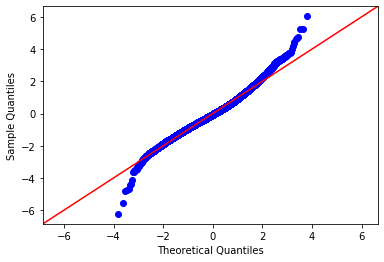

In [450]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)

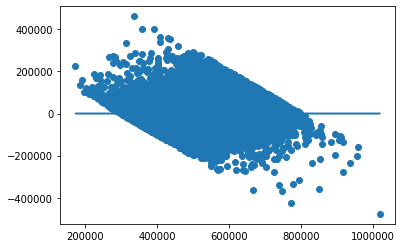

In [451]:
plt.scatter(model1.predict(predictors_1), model1.resid)
plt.plot(model1.predict(predictors_1), [0 for i in range(len(predictors_1))]);

In [452]:
#Dropping columns based on p value
data_final.drop(['lat','grade_5','cond_3','grade_6','grade_7','zip_98002','zip_98003','zip_98007','zip_98008','zip_98011','zip_98014','zip_98019','zip_98022','zip_98023','zip_98024','zip_98027','zip_98028','zip_98028','zip_98034','zip_98045','zip_98065','zip_98072','zip_98074','zip_98075','zip_98077','zip_98118','zip_98125','zip_98126','zip_98133','zip_98136','zip_98144','zip_98146','zip_98148','zip_98155','zip_98166','zip_98198','cond_2'], axis=1,inplace=True)

data_final.head()

,price,bedrooms,bathrooms,floor,basement,sqft_lot,built,long,sqft_liv,miles_belle,...,zip_98177,zip_98178,zip_98188,zip_98199,view_1,view_2,view_3,view_4,water_1,reno_1
1,538000.0,-0.403233,0.213027,0.876007,0.298795,-0.190405,-0.702933,-0.743557,-0.472302,-0.569419,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.691289,1.346072,-0.940225,1.546554,-0.245358,-0.235278,-1.249225,-1.066235,-0.819668,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.403233,-0.164655,-0.940225,-0.679840,-0.169865,0.499607,1.128781,-0.274324,0.515888,...,0,0,0,0,0,0,0,0,0,0
9,323000.0,-0.403233,0.590708,0.876007,-0.679840,-0.207121,1.034069,1.224448,0.787557,1.689126,...,0,0,0,0,0,0,0,0,0,0
10,662500.0,-0.403233,0.590708,-0.940225,3.479357,-0.127804,-0.235278,0.445446,0.463593,-0.174724,...,0,0,0,0,0,0,0,0,0,0


In [453]:
#Model Prediction 2
outcome2 = 'price'
predictors_2 = data_final.drop('price', axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula = outcome2 + '~' + pred_sum_2

model2 = ols(formula=formula, data=data_final).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     462.6
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:05   Log-Likelihood:            -1.8048e+05
No. Observations:               14226   AIC:                         3.611e+05
Df Residuals:                   14165   BIC:                         3.615e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     4.33e+05   1454.896    297.583      0.000     4.3e+05    4.36e+05
bedrooms     1.289e+04    793.678     16.240      0.000    1.13e+04    1.44e+04
bathrooms    2.043e+04   1038.609     19.666      0.000    1.84e+04    2.25e+04
floor         734.1133   1005.212      0.730      0.465   -1236.235    2704.462
basement     3422.9638    835.703      4.096      0.000    1784.876    5061.051
sqft_lot      1.39e+04    718.163     19.362      0.000    1.25e+04    1.53e+04
built       -1.932e+04   1148.266    -16.826      0.000   -2.16e+04   -1.71e+04
long         6.518e+04   1401.636     46.503      0.000    6.24e+04    6.79e+04
sqft_liv     3.999e+04    971.660     41.159      0.000    3.81e+04    4.19e+04
miles_belle -8.543e+04   1616.069    -52.862      0.000   -8.86e+04   -8.23e+04
grade_8       5.38e+04   1760.244     30.564      0.000    5.04e+04    5.73e+04
grade_9      1.248e+05   2767.077     45.119      0.000    1.19e+05     1.3e+05
grade_10     1.692e+05   4777.870     35.408      0.000     1.6e+05    1.79e+05
grade_11     1.958e+05    1.7e+04     11.506      0.000    1.62e+05    2.29e+05
cond_4       1.782e+04   1719.632     10.361      0.000    1.44e+04    2.12e+04
cond_5       4.318e+04   2765.782     15.612      0.000    3.78e+04    4.86e+04
zip_98004    1.749e+05   9720.155     17.997      0.000    1.56e+05    1.94e+05
zip_98005    7.242e+04   8224.827      8.805      0.000    5.63e+04    8.85e+04
zip_98006    1.967e+04   5041.205      3.903      0.000    9791.925    2.96e+04
zip_98010     5.16e+04   1.01e+04      5.125      0.000    3.19e+04    7.13e+04
zip_98029    3.388e+04   4916.051      6.891      0.000    2.42e+04    4.35e+04
zip_98030   -7.576e+04   7709.532     -9.826      0.000   -9.09e+04   -6.06e+04
zip_98031   -9.657e+04   7355.947    -13.129      0.000   -1.11e+05   -8.22e+04
zip_98032   -7.356e+04   1.69e+04     -4.362      0.000   -1.07e+05   -4.05e+04
zip_98033    7.212e+04   4914.894     14.673      0.000    6.25e+04    8.18e+04
zip_98038   -4.706e+04   4358.418    -10.797      0.000   -5.56e+04   -3.85e+04
zip_98039     2.93e+05   7.84e+04      3.736      0.000    1.39e+05    4.47e+05
zip_98040    1.231e+05   9763.092     12.609      0.000    1.04e+05    1.42e+05
zip_98042   -7.202e+04   5164.257    -13.947      0.000   -8.21e+04   -6.19e+04
zip_98052    4.819e+04   3818.383     12.622      0.000    4.07e+04    5.57e+04
zip_98053    6.773e+04   4757.753     14.235      0.000    5.84e+04    7.71e+04
zip_98055   -9.533e+04   7036.497    -13.548      0.000   -1.09e+05   -8.15e+04
zip_98056   -6.554e+04   4847.394    -13.521      0.000    -7.5e+04    -5.6e+04
zip_98058   -1.022e+05   4578.244    -22.320      0.000   -1.11e+05   -9.32e+04
zip_98059   -5.934e+04   4240.989    -13.991      0.000   -6.76e+04    -5.1e+04
zip_98070    1.107e+05   9005.602     12.29

In [454]:
X_train, X_test, y_train, y_test = train_test_split(predictors_2, data_final['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 78031.7952039339
Test RMSE score is : 1.6184836875818232e+16
Train R2 value: 0.6648187238944185
Test R2 value: -1.4583374667126137e+22


In [455]:
results = store_results_to_dict('Model2','After dropping values with p>0.05'
                                     ,model2.rsquared, model2.rsquared_adj)
                                
results

{'Model_Name': 'Model2',
 'Model_Description': 'After dropping values with p>0.05',
 'R2_value': 0.6621184449776771,
 'R2_Adjusted value': 0.6606872488392133}

In [456]:
results_final.append(results)

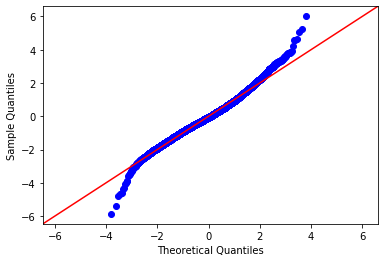

In [457]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

### Variance Inflation Factor
__Typically, variables with a vif of 5 or greater are displaying multicollinearity with other variables in the feature set.__ 

In [458]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = predictors_2
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(predictors_2, vif))

[('bedrooms', 1.4509612694172669),
 ('bathrooms', 2.4519839532306116),
 ('floor', 2.2969577996383763),
 ('basement', 1.6132475040134568),
 ('sqft_lot', 1.191426082490405),
 ('built', 3.0392003118632753),
 ('long', 4.5411722526551275),
 ('sqft_liv', 2.0498975199575256),
 ('miles_belle', 6.008307518067386),
 ('grade_8', 1.8236608300665467),
 ('grade_9', 1.611381536261598),
 ('grade_10', 1.2145751242338776),
 ('grade_11', 1.0228699493312572),
 ('cond_4', 1.5335112682678347),
 ('cond_5', 1.2412272524850212),
 ('zip_98004', 1.0235506005842256),
 ('zip_98005', 1.042301435247159),
 ('zip_98006', 1.1037278770834353),
 ('zip_98010', 1.0541554836117306),
 ('zip_98029', 1.1246949661607708),
 ('zip_98030', 1.0481702566635442),
 ('zip_98031', 1.0302418844197487),
 ('zip_98032', 1.0173925727526312),
 ('zip_98033', 1.0594082155699016),
 ('zip_98038', 1.181332940409691),
 ('zip_98039', 1.0003691097653031),
 ('zip_98040', 1.0352900191300558),
 ('zip_98042', 1.1095916904461953),
 ('zip_98052', 1.1167734

In [459]:
# df_model_results = pd.DataFrame(results_final)
# df_model_results.head()

### Reselecting the variables
In this model, we are selecting the features whom seem to be having a strong correlation with the Price of the house.
Here we are first log transforming the variables and then normalizing them.

In [460]:
log_king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 23 columns):
id                14226 non-null int64
date              14226 non-null datetime64[ns]
price             14226 non-null float64
bedrooms          14226 non-null int64
bathrooms         14226 non-null float64
sqft_living       14226 non-null int64
sqft_lot          14226 non-null int64
floors            14226 non-null float64
waterfront        14226 non-null float64
view              14226 non-null float64
condition         14226 non-null int64
grade             14226 non-null int64
sqft_above        14226 non-null int64
sqft_basement     14226 non-null object
yr_built          14226 non-null int64
yr_renovated      14226 non-null float64
zipcode           14226 non-null int64
lat               14226 non-null float64
long              14226 non-null float64
sqft_living15     14226 non-null int64
sqft_lot15        14226 non-null int64
renovated         14226 non-null object
miles_

In [461]:
# Having a look at our continuous and categorical variables
continuous = ['bedrooms','bathrooms','sqft_lot','sqft_above','sqft_living15','miles_to_belle']

categoricals = ['waterfront', 'grade', 'zipcode','renovated','view']

In [462]:
# Log transform and normalizing the continuous variables
log_king_cont = log_king[continuous]

# Log transformation
log_names = [f'{column}_log' for column in log_king_cont.columns]

king_log = np.log(log_king_cont)
king_log.columns = log_names

# Normalize the varibales(subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

king_log_norm = king_log.apply(normalize)

In [463]:
grade_dummies = pd.get_dummies(log_king['grade'], prefix='grade', drop_first=True)
renovated_dummies = pd.get_dummies(log_king['renovated'], prefix='reno', drop_first=True)
view_dummies = pd.get_dummies(log_king['view'], prefix='view', drop_first=True)
waterfront_dummies = pd.get_dummies(log_king['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(log_king['zipcode'], prefix='zip', drop_first=True)

In [464]:
# Creating a new data frame to store our variables
preprocessed = pd.concat([log_king.price,king_log_norm, grade_dummies,zipcode_dummies,waterfront_dummies,view_dummies,renovated_dummies], axis=1)

preprocessed.head()

,price,bedrooms_log,bathrooms_log,sqft_lot_log,sqft_above_log,sqft_living15_log,miles_to_belle_log,grade_5,grade_6,grade_7,...,zip_98178,zip_98188,zip_98198,zip_98199,water_1.0,view_1.0,view_2.0,view_3.0,view_4.0,reno_1
1,538000.0,-0.291686,0.344045,-0.043067,0.780928,-0.372267,-0.320138,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.758768,1.157775,-0.433311,-1.117046,-1.143933,-0.686404,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.291686,0.010886,0.072275,0.111786,-0.148279,0.685597,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,323000.0,-0.291686,0.642065,-0.147256,0.419732,0.858758,1.330943,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,662500.0,-0.291686,0.642065,0.275143,0.377899,0.580627,0.124291,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [465]:
preprocessed=preprocessed.rename({'view_1.0':'view_1','view_2.0':'view_2','view_3.0':'view_3','view_4.0':'view_4','water_1.0':'water_1'}, axis=1)
preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14226 entries, 1 to 21596
Data columns (total 89 columns):
price                 14226 non-null float64
bedrooms_log          14226 non-null float64
bathrooms_log         14226 non-null float64
sqft_lot_log          14226 non-null float64
sqft_above_log        14226 non-null float64
sqft_living15_log     14226 non-null float64
miles_to_belle_log    14226 non-null float64
grade_5               14226 non-null uint8
grade_6               14226 non-null uint8
grade_7               14226 non-null uint8
grade_8               14226 non-null uint8
grade_9               14226 non-null uint8
grade_10              14226 non-null uint8
grade_11              14226 non-null uint8
zip_98002             14226 non-null uint8
zip_98003             14226 non-null uint8
zip_98004             14226 non-null uint8
zip_98005             14226 non-null uint8
zip_98006             14226 non-null uint8
zip_98007             14226 non-null uint8
zip_98008        

In [466]:
outcome3 = 'price'
predictors_3 = preprocessed.drop('price', axis=1)
pred_sum_3 = '+'.join(predictors_3.columns)
formula = outcome3 + '~' + pred_sum_3

model3 = ols(formula=formula, data=preprocessed).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     374.1
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:14   Log-Likelihood:            -1.7964e+05
No. Observations:               14226   AIC:                         3.595e+05
Df Residuals:                   14137   BIC:                         3.601e+05
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.175e+05   3.16e+04     13.228      0.000    3.56e+05    4.79e+05
bedrooms_log        7326.3797    790.762      9.265      0.000    5776.382    8876.378
bathrooms_log       1.122e+04    890.258     12.598      0.000    9470.728     1.3e+04
sqft_lot_log        3.501e+04    882.500     39.675      0.000    3.33e+04    3.67e+04
sqft_above_log       3.72e+04   1084.553     34.298      0.000    3.51e+04    3.93e+04
sqft_living15_log   2.472e+04    972.304     25.425      0.000    2.28e+04    2.66e+04
miles_to_belle_log -7.544e+04   3375.969    -22.346      0.000   -8.21e+04   -6.88e+04
grade_5            -4.362e+04   3.19e+04     -1.368      0.171   -1.06e+05    1.89e+04
grade_6            -7.171e+04   3.05e+04     -2.349      0.019   -1.32e+05   -1.19e+04
grade_7            -5.572e+04   3.05e+04     -1.828      0.068   -1.15e+05    4040.505
grade_8            -2.701e+04   3.05e+04     -0.884      0.377   -8.69e+04    3.29e+04
grade_9             2.643e+04   3.06e+04      0.862      0.388   -3.36e+04    8.65e+04
grade_10            6.375e+04   3.09e+04      2.065      0.039    3248.019    1.24e+05
grade_11            9.035e+04   3.46e+04      2.615      0.009    2.26e+04    1.58e+05
zip_98002            694.9294   1.85e+04      0.038      0.970   -3.55e+04    3.69e+04
zip_98003          -4318.4568   1.05e+04     -0.412      0.680   -2.49e+04    1.62e+04
zip_98004            3.12e+05   1.25e+04     24.874      0.000    2.87e+05    3.37e+05
zip_98005           2.159e+05   1.12e+04     19.247      0.000    1.94e+05    2.38e+05
zip_98006           1.737e+05   9158.328     18.968      0.000    1.56e+05    1.92e+05
zip_98007           1.684e+05   1.05e+04     15.987      0.000    1.48e+05    1.89e+05
zip_98008           1.804e+05   9087.418     19.847      0.000    1.63e+05    1.98e+05
zip_98010           1.162e+05   1.18e+04      9.822      0.000    9.31e+04    1.39e+05
zip_98011           8.978e+04   9367.411      9.584      0.000    7.14e+04    1.08e+05
zip_98014             9.6e+04   1.07e+04      8.999      0.000    7.51e+04    1.17e+05
zip_98019           8.534e+04   9222.009      9.254      0.000    6.73e+04    1.03e+05
zip_98022           3.162e+04   1.08e+04      2.938      0.003    1.05e+04    5.27e+04
zip_98023          -2.977e+04   9260.552     -3.215      0.001   -4.79e+04   -1.16e+04
zip_98024           1.264e+05   1.25e+04     10.150      0.000    1.02e+05    1.51e+05
zip_98027           1.619e+05   8351.468     19.390      0.000    1.46e+05    1.78e+05
zip_98028           7.103e+04   9092.090      7.812      0.000    5.32e+04    8.89e+04
zip_98029           2.075e+05   8488.091     24.447      0.000    1.91e+05    2.24e+05
zip_98030          -2.114e+04   1.01e+04     -2.091      0.037    -4.1e+04   -1318.843
zip_98031          -2.479e+04   9975.6

In [467]:
X_train, X_test, y_train, y_test = train_test_split(predictors_3, preprocessed['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value is:',test_r_squared)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train RMSE score is : 74343.0572572007
Test RMSE score is : 72356.39726252572
Train R2 value: 0.6966479629607892
Test R2 value is: 0.7058051261807017


In [468]:
results = store_results_to_dict('Model3','Log transforming and Normalizing the selected variables'
                                     ,model3.rsquared, model3.rsquared_adj)

results

{'Model_Name': 'Model3',
 'Model_Description': 'Log transforming and Normalizing the selected variables',
 'R2_value': 0.6995669074864703,
 'R2_Adjusted value': 0.6976967715211884}

In [469]:
results_final.append(results)

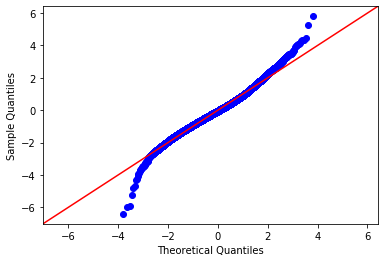

In [470]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

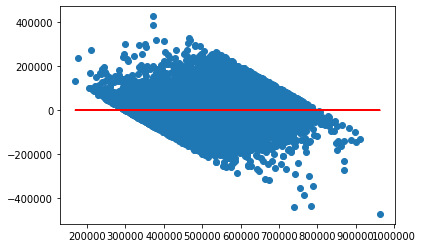

In [471]:
plt.scatter(model3.predict(preprocessed), model3.resid)
plt.plot(model3.predict(preprocessed), [0 for i in range(len(preprocessed))],c='red');

In [472]:
#Dropping columns based on p value
preprocessed.drop(['grade_5','grade_7','grade_8','grade_9','zip_98002','zip_98003','zip_98032','zip_98042','zip_98055','zip_98058','zip_98092','zip_98106','zip_98108','zip_98148','zip_98178','zip_98188'], axis=1,inplace=True)

preprocessed.head()

,price,bedrooms_log,bathrooms_log,sqft_lot_log,sqft_above_log,sqft_living15_log,miles_to_belle_log,grade_6,grade_10,grade_11,...,zip_98168,zip_98177,zip_98198,zip_98199,water_1,view_1,view_2,view_3,view_4,reno_1
1,538000.0,-0.291686,0.344045,-0.043067,0.780928,-0.372267,-0.320138,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,604000.0,0.758768,1.157775,-0.433311,-1.117046,-1.143933,-0.686404,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,-0.291686,0.010886,0.072275,0.111786,-0.148279,0.685597,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,323000.0,-0.291686,0.642065,-0.147256,0.419732,0.858758,1.330943,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,662500.0,-0.291686,0.642065,0.275143,0.377899,0.580627,0.124291,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [473]:
#Model Prediction 4
outcome4 = 'price'
predictors_4 = preprocessed.drop('price', axis=1)
pred_sum_4 = '+'.join(predictors_4.columns)
formula = outcome4 + '~' + pred_sum_4

model4 = ols(formula=formula, data=preprocessed).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     413.9
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:32:17   Log-Likelihood:            -1.8013e+05
No. Observations:               14226   AIC:                         3.604e+05
Df Residuals:                   14153   BIC:                         3.610e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.798e+05   2160.661    175.798      0.000    3.76e+05    3.84e+05
bedrooms_log        2982.9727    801.191      3.723      0.000    1412.534    4553.412
bathrooms_log        1.56e+04    891.964     17.486      0.000    1.38e+04    1.73e+04
sqft_lot_log        3.312e+04    903.680     36.650      0.000    3.13e+04    3.49e+04
sqft_above_log       4.85e+04   1047.214     46.311      0.000    4.64e+04    5.06e+04
sqft_living15_log   3.236e+04    969.709     33.368      0.000    3.05e+04    3.43e+04
miles_to_belle_log -7.545e+04   1978.729    -38.132      0.000   -7.93e+04   -7.16e+04
grade_6            -1.594e+04   2926.271     -5.448      0.000   -2.17e+04   -1.02e+04
grade_10            6.765e+04   4293.955     15.754      0.000    5.92e+04    7.61e+04
grade_11            8.567e+04   1.65e+04      5.192      0.000    5.33e+04    1.18e+05
zip_98004           3.132e+05   9702.135     32.277      0.000    2.94e+05    3.32e+05
zip_98005           2.214e+05   8179.750     27.067      0.000    2.05e+05    2.37e+05
zip_98006           1.834e+05   5129.074     35.755      0.000    1.73e+05    1.93e+05
zip_98007           1.718e+05   7432.644     23.109      0.000    1.57e+05    1.86e+05
zip_98008           1.819e+05   5275.189     34.491      0.000    1.72e+05    1.92e+05
zip_98010           1.213e+05      1e+04     12.125      0.000    1.02e+05    1.41e+05
zip_98011           9.013e+04   5959.162     15.124      0.000    7.84e+04    1.02e+05
zip_98014           9.913e+04   8481.312     11.688      0.000    8.25e+04    1.16e+05
zip_98019           7.871e+04   6382.798     12.331      0.000    6.62e+04    9.12e+04
zip_98022           3.289e+04   8549.003      3.847      0.000    1.61e+04    4.96e+04
zip_98023          -2.463e+04   6449.299     -3.819      0.000   -3.73e+04    -1.2e+04
zip_98024           1.296e+05   1.08e+04     12.027      0.000    1.08e+05    1.51e+05
zip_98027           1.658e+05   4673.546     35.480      0.000    1.57e+05    1.75e+05
zip_98028           7.128e+04   5210.523     13.679      0.000    6.11e+04    8.15e+04
zip_98029           2.188e+05   5026.674     43.530      0.000    2.09e+05    2.29e+05
zip_98030          -1.689e+04   7646.128     -2.210      0.027   -3.19e+04   -1906.853
zip_98031          -2.747e+04   7333.902     -3.746      0.000   -4.18e+04   -1.31e+04
zip_98033           2.013e+05   5089.829     39.547      0.000    1.91e+05    2.11e+05
zip_98034           9.897e+04   4043.668     24.475      0.000     9.1e+04    1.07e+05
zip_98038           3.863e+04   4599.037      8.399      0.000    2.96e+04    4.76e+04
zip_98039           4.027e+05   7.66e+04      5.254      0.000    2.52e+05    5.53e+05
zip_98040           2.511e+05   9774.310     25.688      0.000    2.32e+05     2.7e+05
zip_98045           1.335e+05   6858.5

In [474]:
results = store_results_to_dict('Model4','After dropping values with p>0.05 with our new dataframe'
                                     ,model4.rsquared, model4.rsquared_adj)

results

{'Model_Name': 'Model4',
 'Model_Description': 'After dropping values with p>0.05 with our new dataframe',
 'R2_value': 0.6780073101072572,
 'R2_Adjusted value': 0.6763692493659107}

In [475]:
results_final.append(results)

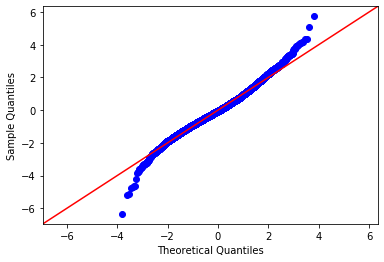

In [476]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

In [477]:
df_model_results=pd.DataFrame(results_final)
df_model_results.head()

,Model_Name,Model_Description,R2_value,R2_Adjusted value
0,Baseline Model,Baseline(with all variables),0.586934,0.586352
1,Model1,All preliminary variables included after Featu...,0.676491,0.674293
2,Model2,After dropping values with p>0.05,0.662118,0.660687
3,Model3,Log transforming and Normalizing the selected ...,0.699567,0.697697
4,Model4,After dropping values with p>0.05 with our new...,0.678007,0.676369


### Stepwise selection with p-values

- In stepwise selection, we start with an empty model (which only includes the intercept), and each time, the variable that has an associated parameter estimate with the lowest p-value is added to the model (forward step). After adding each new variable in the model, the algorithm will look at the p-values of all the other parameter estimates which were added to the model previously, and remove them if the p-value exceeds a certain value (backward step). The algorithm stops when no variables can be added or removed given the threshold values. -

In [478]:
#Stepwise Selection

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
X = preprocessed.drop('price', axis=1)
y = preprocessed['price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  sqft_above_log                 with p-value 0.0
Add  miles_to_belle_log             with p-value 0.0
Add  sqft_living15_log              with p-value 0.0
Add  sqft_lot_log                   with p-value 2.97367e-126
Add  zip_98029                      with p-value 1.76702e-86
Add  zip_98052                      with p-value 5.8483e-90
Add  zip_98053                      with p-value 3.73537e-67
Add  zip_98075                      with p-value 2.04714e-73
Add  zip_98074                      with p-value 2.57612e-70
Add  zip_98033                      with p-value 2.7338e-64
Add  zip_98027                      with p-value 4.7739e-68
Add  zip_98115                      with p-value 6.42927e-65
Add  zip_98004                      with p-value 2.28461e-67
Add  zip_98065                      with p-value 1.34615e-68
Add  zip_98006                      with p-value 2.00047e-71
Add  zip_98008                      with p-value 1.36122e-76
Add  zip_98117                      with p-value 3

In [479]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model5 = sm.OLS(y,X_with_intercept).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     425.4
Date:                Sat, 02 May 2020   Prob (F-statistic):               0.00
Time:                        21:34:52   Log-Likelihood:            -1.8014e+05
No. Observations:               14226   AIC:                         3.604e+05
Df Residuals:                   14155   BIC:                         3.610e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.797e+05   2105.300    180.353      0.000    3.76e+05    3.84e+05
sqft_above_log      4.842e+04   1047.159     46.240      0.000    4.64e+04    5.05e+04
miles_to_belle_log -7.575e+04   1961.408    -38.618      0.000   -7.96e+04   -7.19e+04
sqft_living15_log   3.229e+04    969.601     33.301      0.000    3.04e+04    3.42e+04
sqft_lot_log        3.317e+04    903.329     36.720      0.000    3.14e+04    3.49e+04
zip_98029           2.193e+05   4975.028     44.077      0.000     2.1e+05    2.29e+05
zip_98052           1.991e+05   3962.802     50.243      0.000    1.91e+05    2.07e+05
zip_98053           1.929e+05   4827.038     39.968      0.000    1.83e+05    2.02e+05
zip_98075           2.011e+05   5430.336     37.035      0.000     1.9e+05    2.12e+05
zip_98074           1.769e+05   4604.317     38.420      0.000    1.68e+05    1.86e+05
zip_98033           2.014e+05   5065.135     39.755      0.000    1.91e+05    2.11e+05
zip_98027           1.662e+05   4624.161     35.940      0.000    1.57e+05    1.75e+05
zip_98115            1.88e+05   4614.387     40.752      0.000    1.79e+05    1.97e+05
zip_98004           3.132e+05   9695.371     32.303      0.000    2.94e+05    3.32e+05
zip_98065           1.514e+05   5292.193     28.602      0.000    1.41e+05    1.62e+05
zip_98006           1.836e+05   5103.877     35.965      0.000    1.74e+05    1.94e+05
zip_98008           1.821e+05   5244.315     34.723      0.000    1.72e+05    1.92e+05
zip_98117           1.787e+05   4859.942     36.761      0.000    1.69e+05    1.88e+05
bathrooms_log       1.561e+04    892.138     17.493      0.000    1.39e+04    1.74e+04
zip_98103           1.642e+05   5036.555     32.600      0.000    1.54e+05    1.74e+05
zip_98005           2.215e+05   8168.292     27.120      0.000    2.06e+05    2.38e+05
zip_98045           1.341e+05   6797.985     19.721      0.000    1.21e+05    1.47e+05
zip_98040            2.51e+05   9768.855     25.695      0.000    2.32e+05     2.7e+05
zip_98105           2.103e+05   7349.551     28.615      0.000    1.96e+05    2.25e+05
zip_98007           1.719e+05   7415.873     23.186      0.000    1.57e+05    1.86e+05
grade_10            6.773e+04   4294.843     15.771      0.000    5.93e+04    7.62e+04
zip_98112           2.076e+05   8505.500     24.406      0.000    1.91e+05    2.24e+05
zip_98107           1.607e+05   6283.816     25.571      0.000    1.48e+05    1.73e+05
view_4               1.07e+05   1.03e+04     10.356      0.000    8.68e+04    1.27e+05
zip_98072           1.158e+05   5382.453     21.506      0.000    1.05e+05    1.26e+05
zip_98034            9.91e+04   4009.141     24.717      0.000    9.12e+04    1.07e+05
view_3               6.87e+04   5131.736     13.388      0.000    5.86e+04    7.88e+04
zip_98077           1.253e+05   6936.7

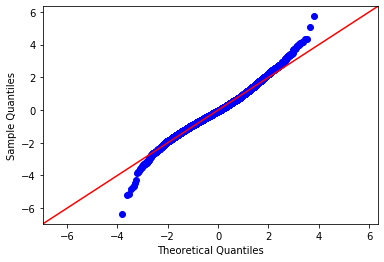

In [480]:
#QQ Plot
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model5.resid, dist=stats.norm, line='45', fit=True)

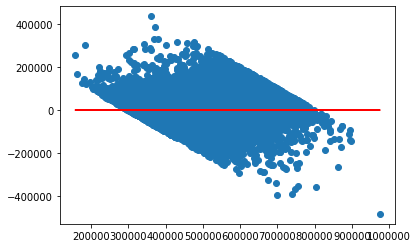

In [481]:
plt.scatter(model5.predict(X_with_intercept), model5.resid)
plt.plot(model5.predict(X_with_intercept), [0 for i in range(len(X_with_intercept))],c='red');


In [482]:
results = store_results_to_dict('Model5','Using stepwise selection'
                                     ,model5.rsquared, model5.rsquared_adj)
results            

{'Model_Name': 'Model5',
 'Model_Description': 'Using stepwise selection',
 'R2_value': 0.6778022610601604,
 'R2_Adjusted value': 0.6762089130046472}

In [483]:
results_final.append(results)

In [484]:
df_model_results = pd.DataFrame(results_final)
df_model_results.style.set_properties(subset=['Model_Description'], **{'width': '300px'})
#df_model_results.head(10)

,Model_Name,Model_Description,R2_value,R2_Adjusted value
0,Baseline Model,Baseline(with all variables),0.586934,0.586352
1,Model1,All preliminary variables included after Feature selection,0.676491,0.674293
2,Model2,After dropping values with p>0.05,0.662118,0.660687
3,Model3,Log transforming and Normalizing the selected variables,0.699567,0.697697
4,Model4,After dropping values with p>0.05 with our new dataframe,0.678007,0.676369
5,Model5,Using stepwise selection,0.677802,0.676209


### Observations

The average cost of a house in King County is about $540,297.

Renovated houses seems to have higher price than non-renovated

Sqft living, bathrooms,grade and zipcode are important features.
Zipcodes 98039 has higher price .
The Sqft living has a positive correlation with the price
Bathrooms has strong positive correlation with price.
Bedrooms also has moderate positive correlation with price

The distance to a workplace does influence the price of a house

A house with waterfront feature also has higher price for a house.

### Conclusion

Predicting house prices is quite complex and challenging because they depend on various factors such as 
Sqft living, No. of bathrooms, Grade of a house and Zipcode.
The other factors that influence the price of a house are Distance to workplace, Renovation and Waterfront feature.

We see that the Grade of a house, Zipcode and Bathrooms have large positive coefficients which indicate the effect they
have on the pricing of a house.


In Model 3, we divided our data into continuous and categorical data. We then took a log of our continuous variables
and then normalized it. We categorized our categorical data and added them into a single data frame and then our 
regression model which gives us a R2 score of 0.7.
Also, when we check the conditions for Normality, the QQ plot
and the Homoscedasticity graph looks quite appropriate. Hence we will go with the Model 3.

Our results indicate that in order to provide accurate predictions of house prices, a very large
number of features must be used and that they most likely need to be combined with a powerful,
complex and non-linear model.

### Future work and research
During the EDA, we came across lot of outliers in terms of prices and other featues. We would like to take a look into that data.
Also, segment the houses into luxury houses and ordinary houses. Also take into consideration the amenities and the
neighbourhood of the locality that definitely increase the price of a house.